In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout,LayerNormalization
import sklearn
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, LayerNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1

In [4]:
train=pd.read_csv('/Users/radhikamonpara/Multiverse_Radhika_Exercise2/data/train.csv')
test=pd.read_csv('/Users/radhikamonpara/Multiverse_Radhika_Exercise2/data/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y=train['label']
X=train.drop('label',axis=1)
#test_Y = np.array(test.iloc[:,0])

In [7]:
test.iloc[:,0]

0        0
1        0
2        0
3        0
4        0
        ..
27995    0
27996    0
27997    0
27998    0
27999    0
Name: pixel0, Length: 28000, dtype: int64

In [8]:
X.shape

(42000, 784)

In [9]:
test.shape

(28000, 784)

In [10]:
classes = np.unique(y)
num_classes = len(classes)
num_classes

10

In [11]:
X=np.dstack([X] * 3)
test=np.dstack([test]*3)
X.shape,test.shape #we convert the images to 3 channels

((42000, 784, 3), (28000, 784, 3))

In [12]:
X = X.reshape(-1, 28,28,3) #image reshaping as per tensorflow format
test= test.reshape (-1,28,28,3)
X.shape,test.shape

((42000, 28, 28, 3), (28000, 28, 28, 3))

In [13]:
# Resize the images 224 by 224 for VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in X])
test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in test])
X.shape, test.shape

((42000, 224, 224, 3), (28000, 224, 224, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


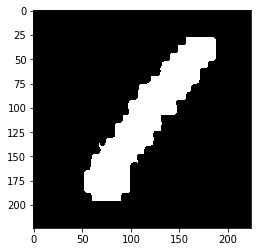

In [14]:
plt.imshow(X[0,:,:,:])

In [15]:
X = X.astype('float32') 
test = test.astype('float32')

In [16]:
from keras.utils.np_utils import to_categorical
y_onehot= to_categorical(y)
num_classes = y_onehot.shape[1]
num_classes

10

In [17]:
train_X,valid_X,train_label,valid_label = train_test_split(X,
                                                           y_onehot,
                                                           test_size=0.3,
                                                           random_state=17
                                                           )

In [18]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape #lets check the data size if it is as per the requirement of VGG16

((29400, 224, 224, 3), (12600, 224, 224, 3), (29400, 10), (12600, 10))

In [19]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_DEPTH = 3
BATCH_SIZE = 56 #stochastic gradient 

In [20]:
# Preprocessing the input 
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test)

In [21]:
#  Create base model of VGG16

model=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=10,
    classifier_activation="softmax",
)
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
#feature extraction
train_features = model.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = model.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = model.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

225/225 [==============================] - 1542s 7s/step


In [23]:
#Saving the features
np.savez("train_features", train_features, train_label)
#np.savez("test_features", test_features, test_Y)
np.savez("val_features", val_features, valid_label)

In [24]:
print(train_features.shape, "\n", val_features.shape)

(29400, 7, 7, 512) 
 (12600, 7, 7, 512)


In [25]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (29400, 7*7*512))
test_features_flat = np.reshape(test_features, (28000, 7*7*512))
val_features_flat = np.reshape(val_features, (12600, 7*7*512))

In [26]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 50

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(7*7*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model.
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['acc'])

reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

# Train the the model
history = model.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Epoch 1/50
919/919 [==============================] - 46s 50ms/step - loss: 0.5612 - acc: 0.9643 - val_loss: 0.1216 - val_acc: 0.9797 - lr: 0.0010
Epoch 2/50
919/919 [==============================] - 46s 50ms/step - loss: 0.1062 - acc: 0.9837 - val_loss: 0.1198 - val_acc: 0.9826 - lr: 0.0010
Epoch 3/50
919/919 [==============================] - 47s 51ms/step - loss: 0.0932 - acc: 0.9894 - val_loss: 0.1845 - val_acc: 0.9839 - lr: 0.0010
Epoch 4/50
918/919 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9905
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
919/919 [==============================] - 48s 53ms/step - loss: 0.0737 - acc: 0.9904 - val_loss: 0.1733 - val_acc: 0.9856 - lr: 0.0010
Epoch 5/50
919/919 [==============================] - 49s 53ms/step - loss: 0.0148 - acc: 0.9971 - val_loss: 0.1066 - val_acc: 0.9909 - lr: 2.0000e-04
Epoch 6/50
919/919 [==============================] - 46s 50ms/step - loss: 0.0013 - acc: 0.9997 - v

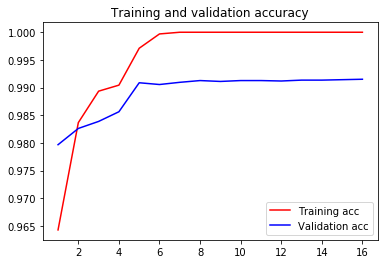

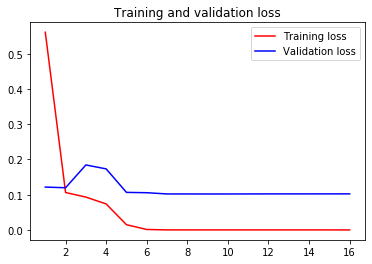

In [27]:
# plot the loss and accuracy i.e. the learning curves of the model. how well the model learned the parameters

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()